## 1.Exploring data

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## 2.Splitting Whole data into training and testing folders

In [1]:
!pip install split-folders

In [2]:
import splitfolders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("../input/rice-image-dataset/Rice_Image_Dataset", output="./",
    seed=1337, ratio=(.8, .2), group_prefix=None, move=False)

Copying files: 75000 files [08:19, 150.11 files/s]


In [4]:
import os
train = os.listdir('./train/Karacadag')
test = os.listdir('./val/Karacadag')

print(len(train))
print(len(test))

12000
3000


In [5]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from keras import layers,mixed_precision
from shutil import copyfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

## 3.Viewing random mages

In [6]:
def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['basmati (9256).jpg']
Image shape: (250, 250, 3)


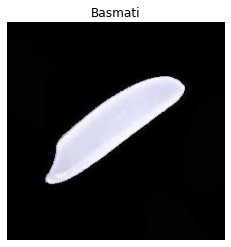

In [10]:
img = view_random_image(target_dir="./train/",target_class="Basmati")

## 4.Dividing data into batches

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = "./train"
test_dir = "./val"
# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


## 5. Building baseline model

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPool2D,Flatten,Dropout
# How about we try and simplify the model first?
# Let's try to remove 2 convolutional layers...
model = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(5, activation="softmax")
])

model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [15]:
history = model.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
1875/1875 [==============================] - 135s 71ms/step - loss: 0.1078 - accuracy: 0.9645 - val_loss: 0.0729 - val_accuracy: 0.9754
Epoch 2/5
1875/1875 [==============================] - 134s 71ms/step - loss: 0.0435 - accuracy: 0.9856 - val_loss: 0.0303 - val_accuracy: 0.9906
Epoch 3/5
1875/1875 [==============================] - 132s 70ms/step - loss: 0.0405 - accuracy: 0.9867 - val_loss: 0.0253 - val_accuracy: 0.9920
Epoch 5/5
1875/1875 [==============================] - 136s 73ms/step - loss: 0.0251 - accuracy: 0.9918 - val_loss: 0.0702 - val_accuracy: 0.9769


## 6.Evaluating model with loss curves

In [16]:
# Let's create a function to plot our loss curves...
# Tidbit: you could put a function like this into a script called "helper.py" and import it when you need it...
import matplotlib.pyplot as plt

# Plot the validation and training curves
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow History object.

  Returns:
    Plots of training/validation loss and accuracy metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();

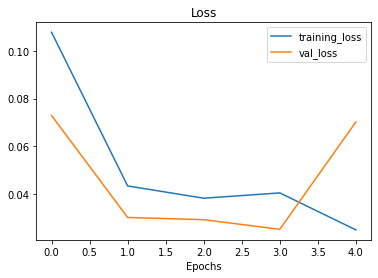

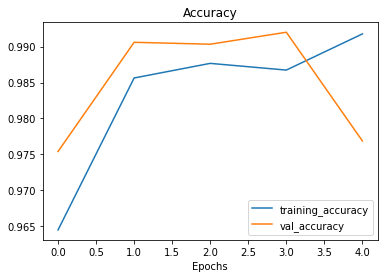

In [17]:
plot_loss_curves(history)

In [19]:
history_2 = model.fit(train_data,
                        epochs=3,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/3
1875/1875 [==============================] - 133s 71ms/step - loss: 0.0194 - accuracy: 0.9937 - val_loss: 0.0461 - val_accuracy: 0.9858
Epoch 2/3
1875/1875 [==============================] - 133s 71ms/step - loss: 0.0174 - accuracy: 0.9941 - val_loss: 0.0318 - val_accuracy: 0.9914
Epoch 3/3
1875/1875 [==============================] - 136s 73ms/step - loss: 0.0165 - accuracy: 0.9949 - val_loss: 0.0756 - val_accuracy: 0.9770


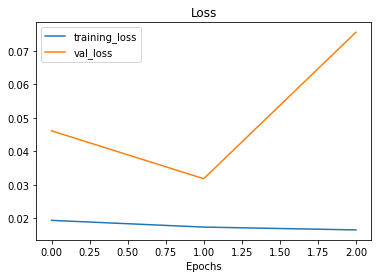

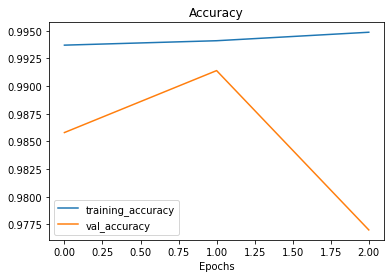

In [20]:
# as accuracy is decreased in 3rd epoch let's decrease no of epochs and check accuracy
plot_loss_curves(history_2)

In [21]:

history_3 = model.fit(train_data,
                        epochs=2,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/2
1875/1875 [==============================] - 134s 71ms/step - loss: 0.0133 - accuracy: 0.9955 - val_loss: 0.0270 - val_accuracy: 0.9927
Epoch 2/2
1875/1875 [==============================] - 130s 70ms/step - loss: 0.0144 - accuracy: 0.9955 - val_loss: 0.0360 - val_accuracy: 0.9907


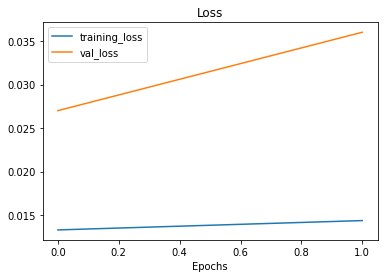

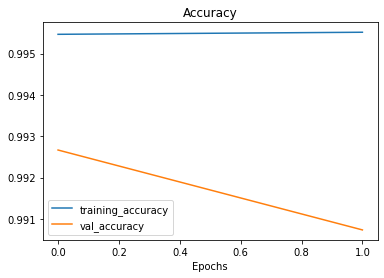

In [23]:
plot_loss_curves(history_3)

In [25]:
history_4=model.fit(train_data,
                    epochs=1,
                   steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data),
                   )

1875/1875 [==============================] - 133s 71ms/step - loss: 0.0114 - accuracy: 0.9963 - val_loss: 0.0323 - val_accuracy: 0.9925
